In [151]:
import pandas as pd
import numpy as np

In [152]:
snacks_sales = pd.read_csv("Snacks_Data.csv")

In [153]:
snacks_sales['Month'] = pd.DatetimeIndex(snacks_sales['Date']).month

In [154]:
Quarter_Mapping = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}

In [155]:
snacks_sales['Quarter'] = snacks_sales['Month'].map(Quarter_Mapping)

In [156]:
snacks_sales.shape

(1095, 12)

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

## Line plots with relplot()

Text(0.5, 1.0, 'line plot')

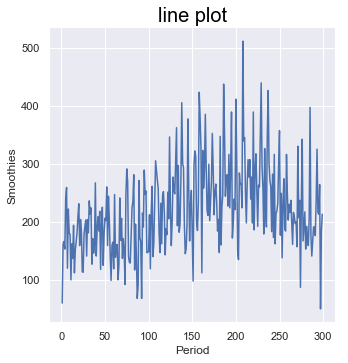

In [158]:
sns.set(style='darkgrid')
sns.relplot(x='Period', y='Smoothies', data=snacks_sales.query('Period < 300'), kind='line')
plt.title('line plot', size=20, color='black')

Text(0.5, 1.0, 'line plot with hue')

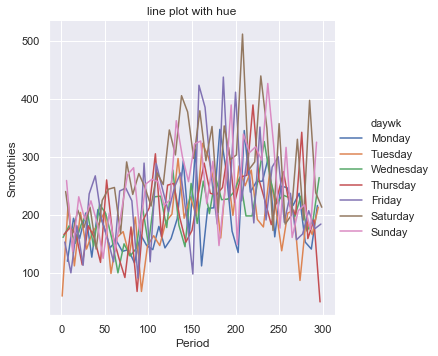

In [159]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.relplot(x='Period', y='Smoothies', hue='daywk', 
            hue_order = day_order, 
            data=snacks_sales.query('Period < 300'), kind='line')

plt.title('line plot with hue')

Text(0.5, 1.0, 'line plot with hue and style')

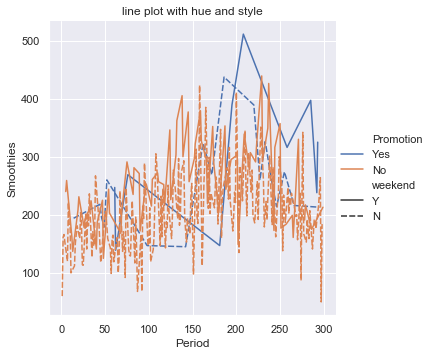

In [160]:
sns.relplot(x='Period', y='Smoothies', hue='Promotion', hue_order=['Yes', 'No'], style='weekend', 
           style_order=['Y', 'N'], kind='line',
           data=snacks_sales.query('Period < 300'))
plt.title('line plot with hue and style')

Text(0.5, 1.0, 'line plot')

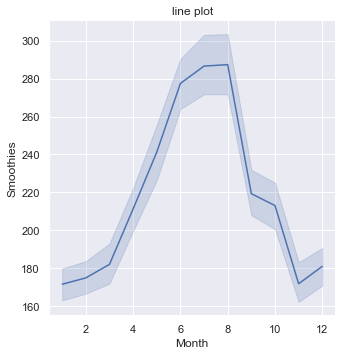

In [161]:
sns.relplot(x='Month', y='Smoothies', data=snacks_sales, kind='line')
plt.title('line plot')

Text(0.5, 1.0, 'line plot with with hue and error bar')

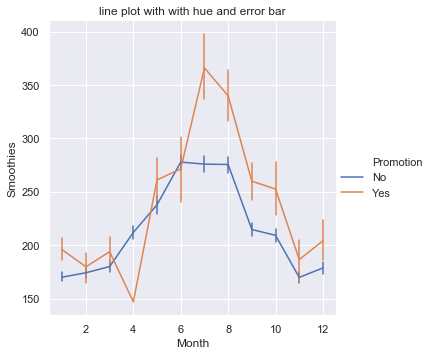

In [162]:
sns.relplot(x='Month', y='Smoothies', hue='Promotion', 
           data=snacks_sales, kind='line',
           err_style='bars', ci=68)
plt.title('line plot with with hue and error bar')

Text(0.5, 1.0, 'line plot with hue and style')

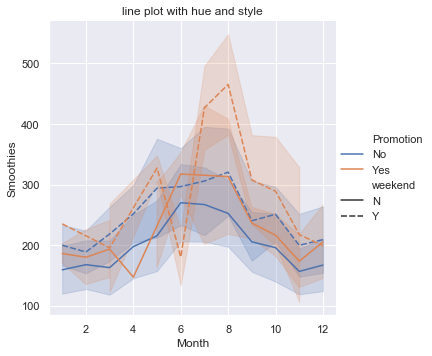

In [163]:
sns.relplot(x='Month', y='Smoothies', hue='Promotion', style='weekend', 
           kind='line', ci='sd', data=snacks_sales)
plt.title('line plot with hue and style')

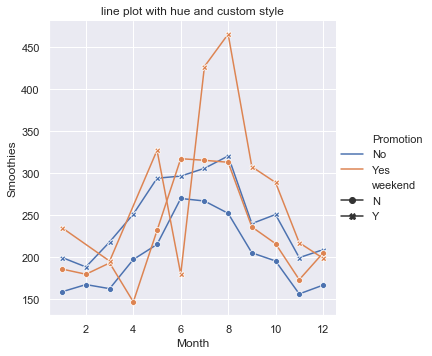

In [164]:
sns.relplot(x='Month', y='Smoothies', hue='Promotion', style='weekend',
           dashes=False, markers=True,
           data=snacks_sales, kind='line', ci=None)
plt.title('line plot with hue and custom style')
plt.show()

### Converting the data set from wide to long format

In [165]:
long_sales = pd.melt(snacks_sales, var_name='Item', value_name='Sales',
                    id_vars=['daywk', 'weekend', 'Date', 'Promotion', 
                             'Period', 'Month', 'Quarter'])
long_sales.shape

(5475, 9)

In [166]:
long_sales.sample(3)

,daywk,weekend,Date,Promotion,Period,Month,Quarter,Item,Sales
4539,Sunday,Y,6/9/2015,No,160,6,2,Coffee,315
3563,Sunday,Y,10/6/2015,No,279,10,4,Smoothies,217
2432,Saturday,Y,8/31/2015,No,243,8,3,Cookies,547


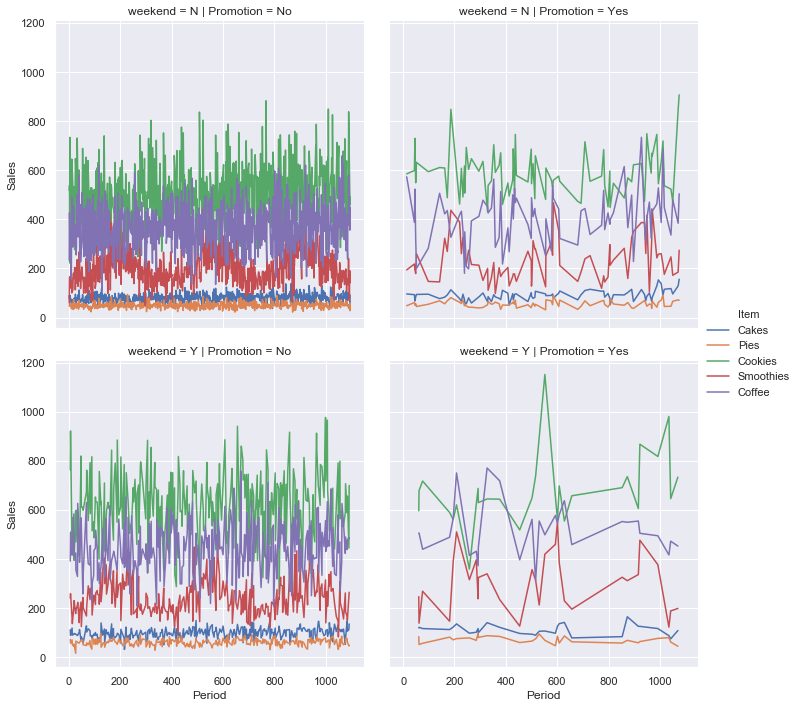

In [167]:
g = sns.relplot(x='Period', y='Sales', data=long_sales, kind='line',
               hue='Item', row='weekend', col='Promotion')

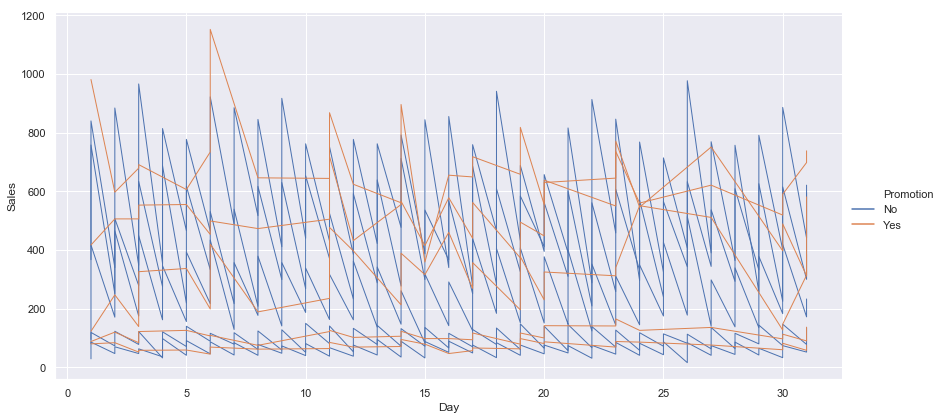

In [168]:
long_sales['Day'] = pd.DatetimeIndex(long_sales['Date']).day
sns.relplot(x='Day', y='Sales', hue='Promotion', 
           data=long_sales.query("weekend =='Y'"), kind='line',
           units="Item", estimator=None, lw=1, height=6, aspect=2)
plt.show()

## Scatter plots with relplot()

Text(0.5, 1.0, 'scatter plot')

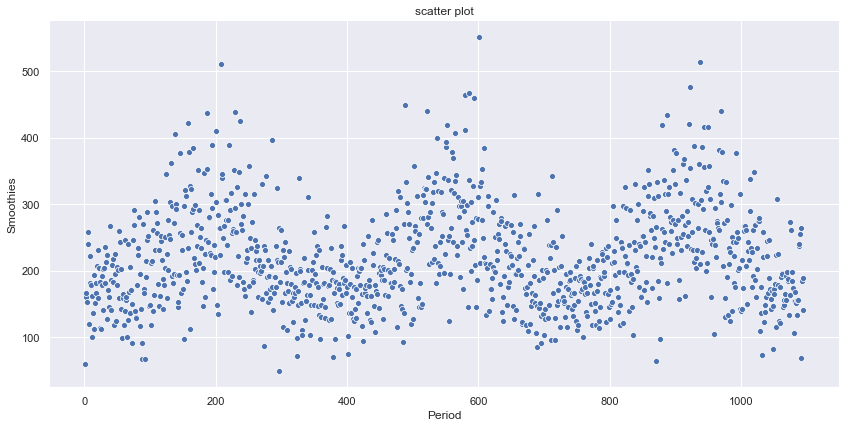

In [169]:
sns.relplot(x='Period', y='Smoothies', data=snacks_sales, 
           kind='scatter', lw=1, height=6, aspect=2)
plt.title('scatter plot')

Text(0.5, 1.0, 'scatter plot with hue')

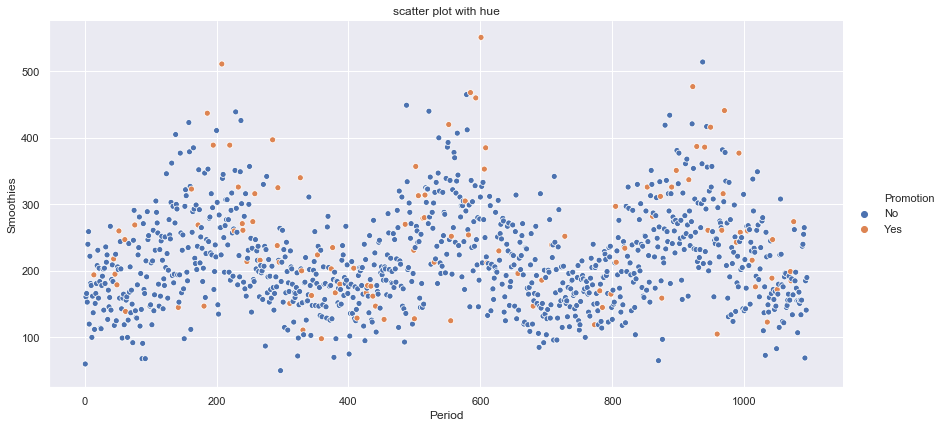

In [170]:
sns.relplot(x='Period', y='Smoothies', hue='Promotion',
           data=snacks_sales, height=6, aspect=2)
plt.title('scatter plot with hue')

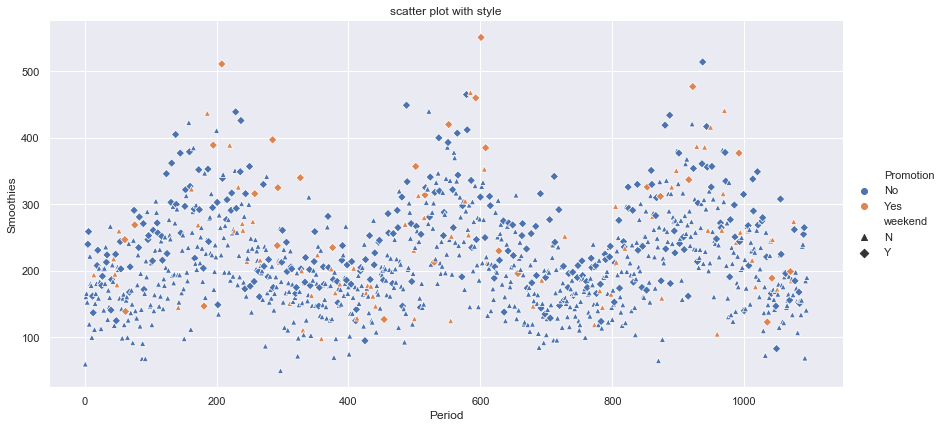

In [171]:
sns.relplot(x='Period', y='Smoothies', hue='Promotion', style='weekend', markers=['^', 'D'],
           data=snacks_sales, height=6, aspect=2)
plt.title('scatter plot with style')
plt.show()

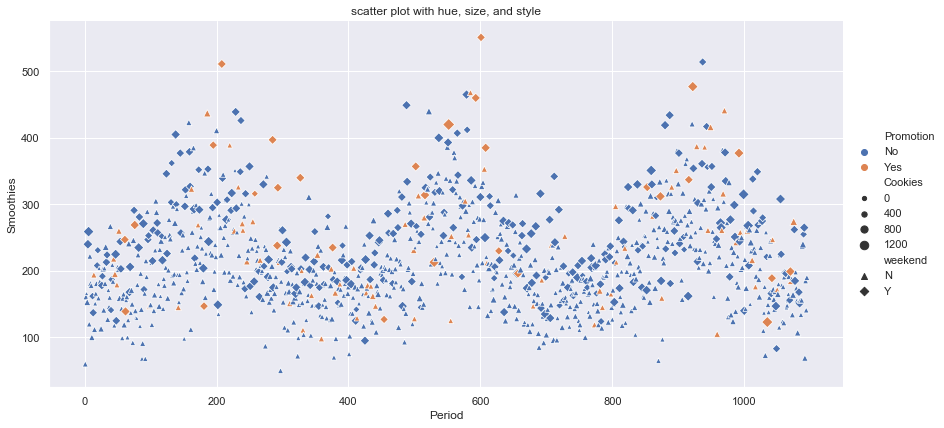

In [172]:
sns.relplot(x='Period', y='Smoothies', hue='Promotion', style='weekend', size='Cookies', markers=['^', 'D'],
            data=snacks_sales, height=6, aspect=2)
plt.title('scatter plot with hue, size, and style')
plt.show()

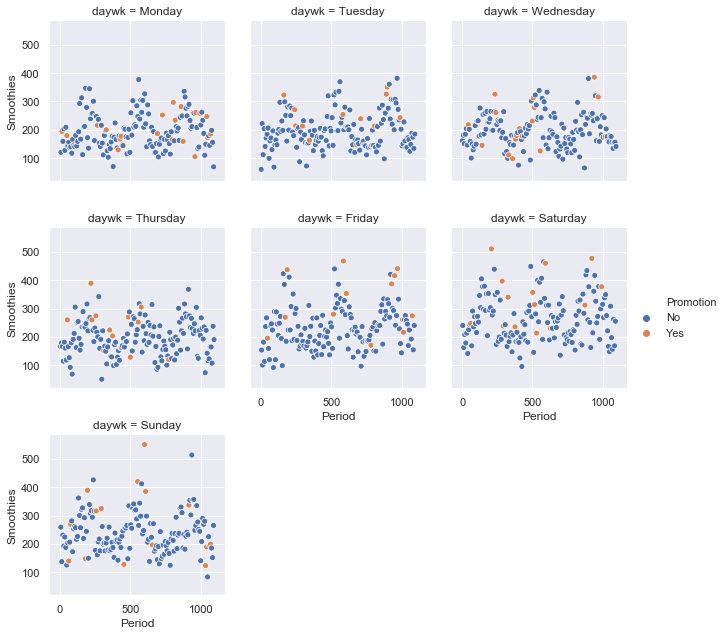

In [173]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(x='Period', y='Smoothies', hue='Promotion', col='daywk',
           col_wrap=3, col_order=day_order, data=snacks_sales, height=3)

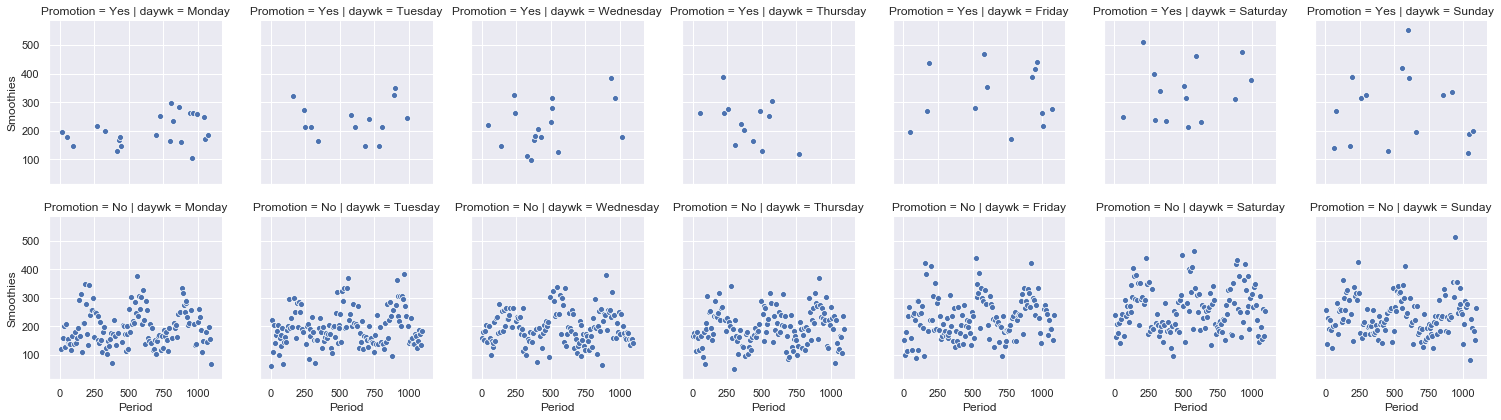

In [174]:
sns.relplot(x='Period', y='Smoothies', col='daywk', 
            col_order=day_order, row='Promotion', row_order=['Yes', 'No'], 
            data=snacks_sales, height=3)
plt.show()

## Strip and swarm plots with catplot()

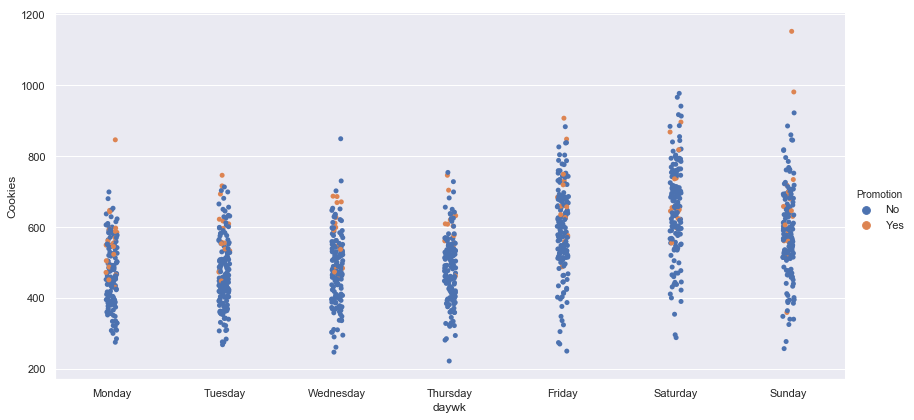

In [175]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(x='daywk', y='Cookies', data=snacks_sales, hue='Promotion', order=day_order,
           jitter=0.05, height=6, aspect=2, kind='strip')

plt.show()

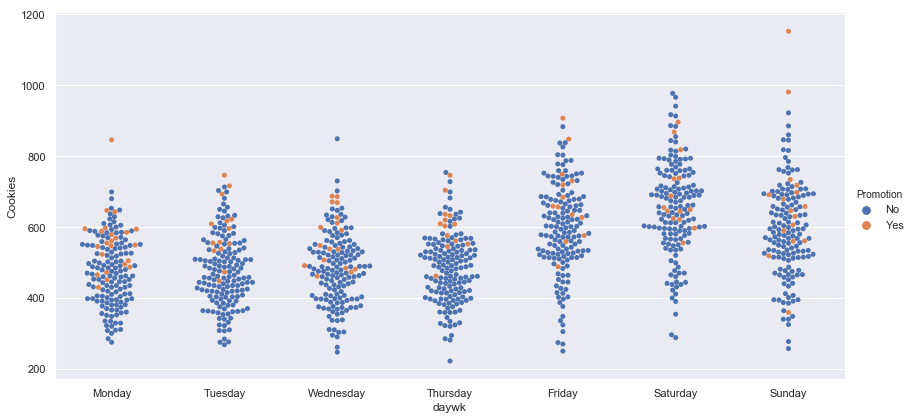

In [176]:
sns.catplot(x='daywk', y='Cookies', data=snacks_sales, order=day_order, hue='Promotion', 
           kind='swarm', height=6, aspect=2)
plt.show()

## Box and boxn plots

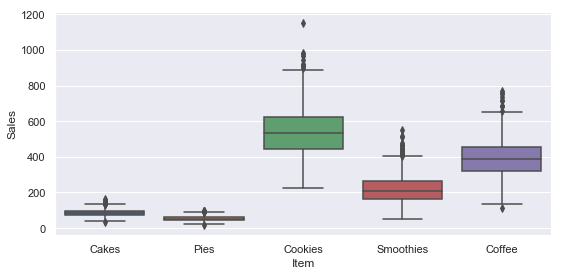

In [177]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='box', height=4, aspect=2)
plt.show()

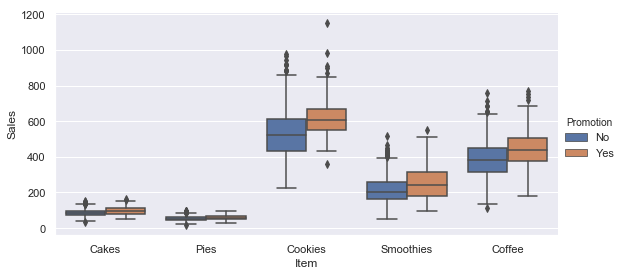

In [178]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='box', hue='Promotion', height=4, aspect=2)
plt.show()

Details on boxnplot:
http://vita.had.co.nz/papers/letter-value-plot.pdf

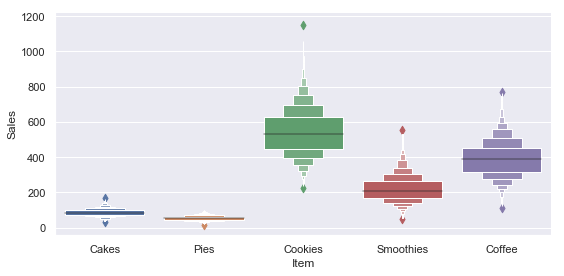

In [179]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='boxen', height=4, aspect=2)
plt.show()

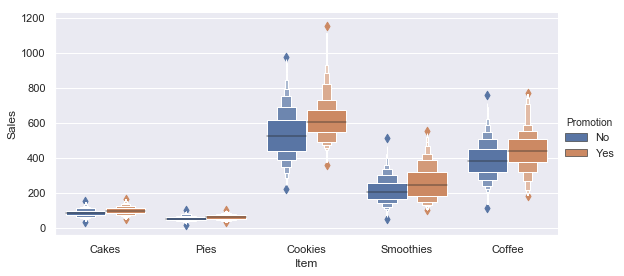

In [180]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='boxen', hue='Promotion', height=4, aspect=2)
plt.show()

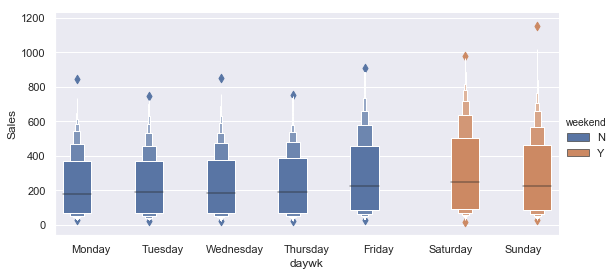

In [181]:
sns.catplot(y='Sales', x='daywk', data=long_sales, kind='boxen', hue='weekend',
           order=day_order, height=4, aspect=2)
plt.show()

## Violin plots

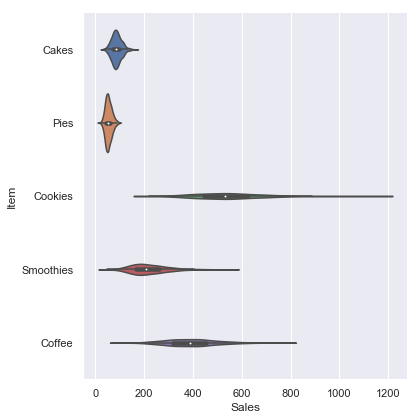

In [182]:
sns.set(style='darkgrid', color_codes=True)
sns.catplot(x='Sales', y='Item', data=long_sales, kind='violin', height=6, aspect=1)
plt.show()

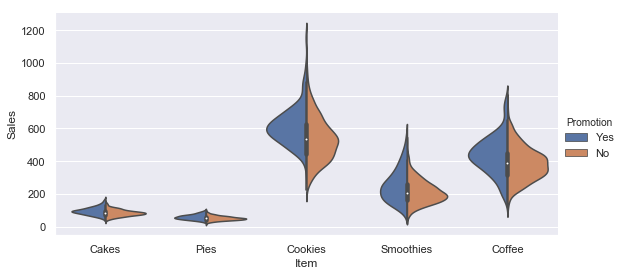

In [183]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='violin', hue="Promotion", 
           hue_order=['Yes', 'No'], split=True, height=4, aspect=2)

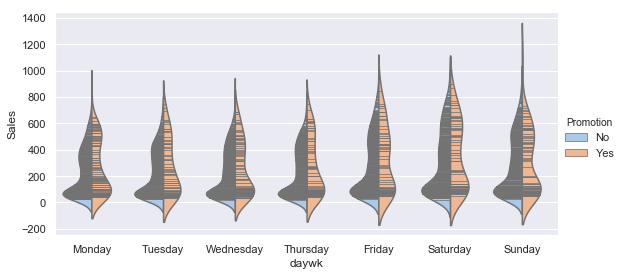

In [184]:
day_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(x='daywk', y='Sales', data=long_sales, kind='violin',
            order=day_order, hue='Promotion', heu_order=['Yes', 'No'], split=True, inner='stick',
            palette='pastel', height=4, aspect=2)
plt.show()

(0.0, 1.0, 0.0, 1.0)

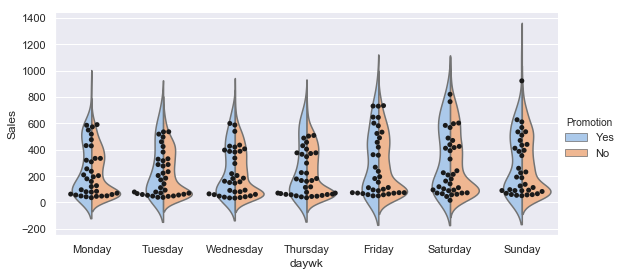

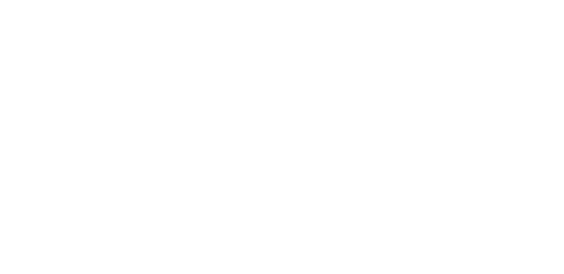

In [185]:
g = sns.catplot(x='daywk', y='Sales', data=long_sales, 
               kind='violin', order=day_order, hue='Promotion', 
               hue_order=['Yes', 'No'], split=True, inner=None,
               palette='pastel', height=4, aspect=2)

#overlay swarm plot
sns.catplot(x='daywk', y='Sales', data=long_sales[long_sales['Period'] < 50], order=day_order,
           color='k', kind='swarm', height=4, aspect=2, ax=g.ax)

plt.axis('off')

## Bar and count plots

In [202]:
from numpy import median

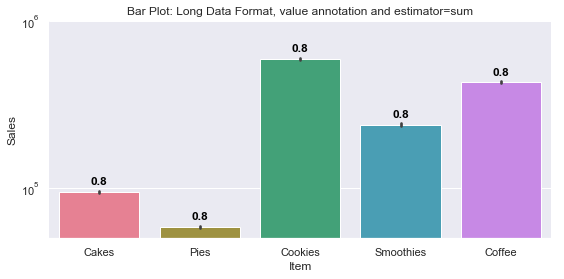

In [216]:
plt.figure(figsize=(9,4))
b = sns.barplot(x='Item', y='Sales', data=long_sales, estimator=sum, palette='husl')
b.set(yscale='log', ylim=[50000, 1000000])

sns.despine(left=True, right=True)

for bar in b.patches:
    b.annotate("{:,}".format(bar.get_width()), 
               (bar.get_x() + bar.get_width()/2., bar.get_height()),
              ha='center', va='center', xytext=(0,10),
              textcoords='offset points', color='black', weight='bold')


plt.title('Bar Plot: Long Data Format, value annotation and estimator=sum')
plt.show()

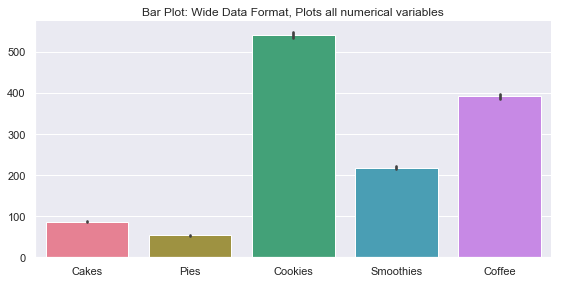

In [221]:
sns.catplot(data=snacks_sales, kind='bar', height=4, aspect=2,
           order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee'], palette='husl')


plt.title('Bar Plot: Wide Data Format, Plots all numerical variables')

plt.show()

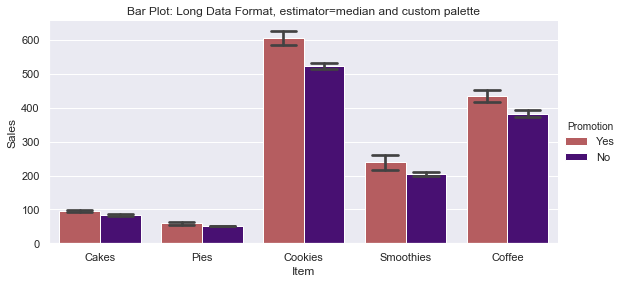

In [222]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='bar', hue='Promotion', hue_order=['Yes', 'No'],
            palette={'Yes':'r', 'No':'indigo'}, estimator=median, capsize=0.25, height=4, aspect=2)

plt.title('Bar Plot: Long Data Format, estimator=median and custom palette')

plt.show()

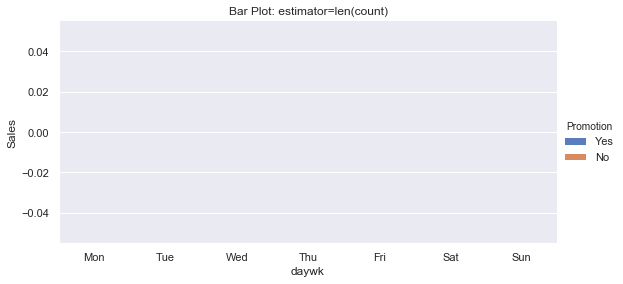

In [228]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.catplot(x='daywk', y='Sales', data=long_sales, kind='bar', 
           hue='Promotion', ci='sd', 
           estimator=len, capsize=0.25, errcolor='m', errwidth=5,
           hue_order=['Yes', 'No'], palette='muted',
           order=day_order, height=4, aspect=2)

plt.title('Bar Plot: estimator=len(count)')
plt.show()

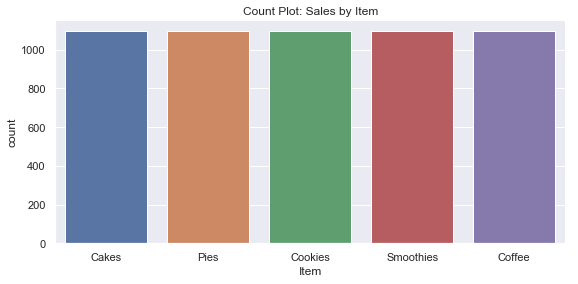

In [230]:
sns.catplot(x='Item', data=long_sales, kind='count', height=4, aspect=2)

plt.title('Count Plot: Sales by Item')
plt.show()

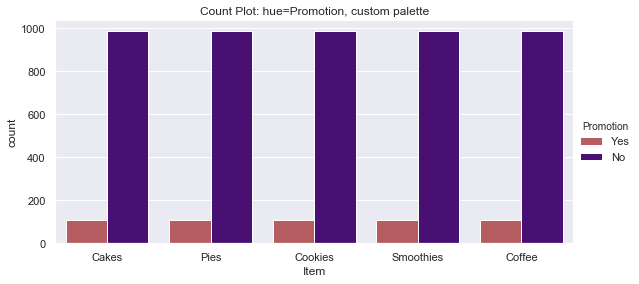

In [232]:
sns.catplot(x='Item', data=long_sales, kind='count', 
            hue='Promotion', hue_order=['Yes', 'No'], 
            palette={'Yes':'r', 'No':'indigo'}, height=4, aspect=2)

plt.title('Count Plot: hue=Promotion, custom palette')
plt.show()

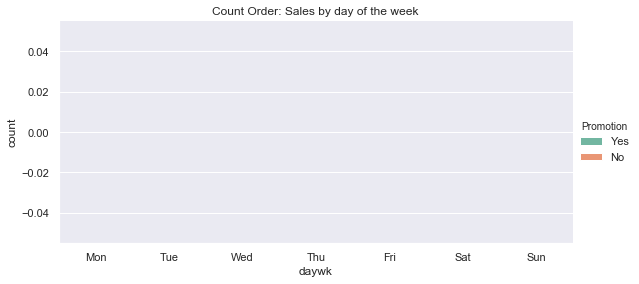

In [233]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.catplot(x='daywk', data=long_sales, kind='count', 
           hue='Promotion', hue_order=['Yes', 'No'],
           palette='Set2', order=day_order, height=4, aspect=2)

plt.title('Count Order: Sales by day of the week')

plt.show()

## Point plots

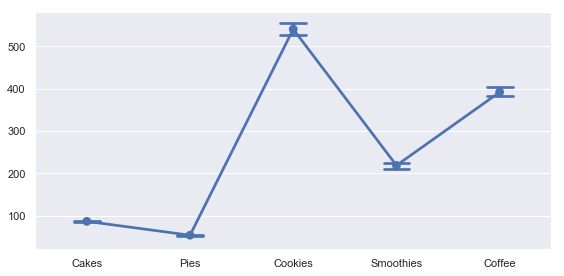

In [186]:
sns.catplot(data=snacks_sales, kind='point', ci=99.99, capsize=0.25, height=4, aspect=2, 
            order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']) # issue with 'weekday', 'Period'
plt.show()

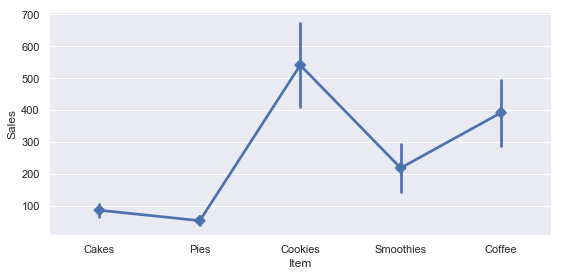

In [187]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='point', 
           markers='D', ci='sd', height=4, aspect=2)
plt.show()

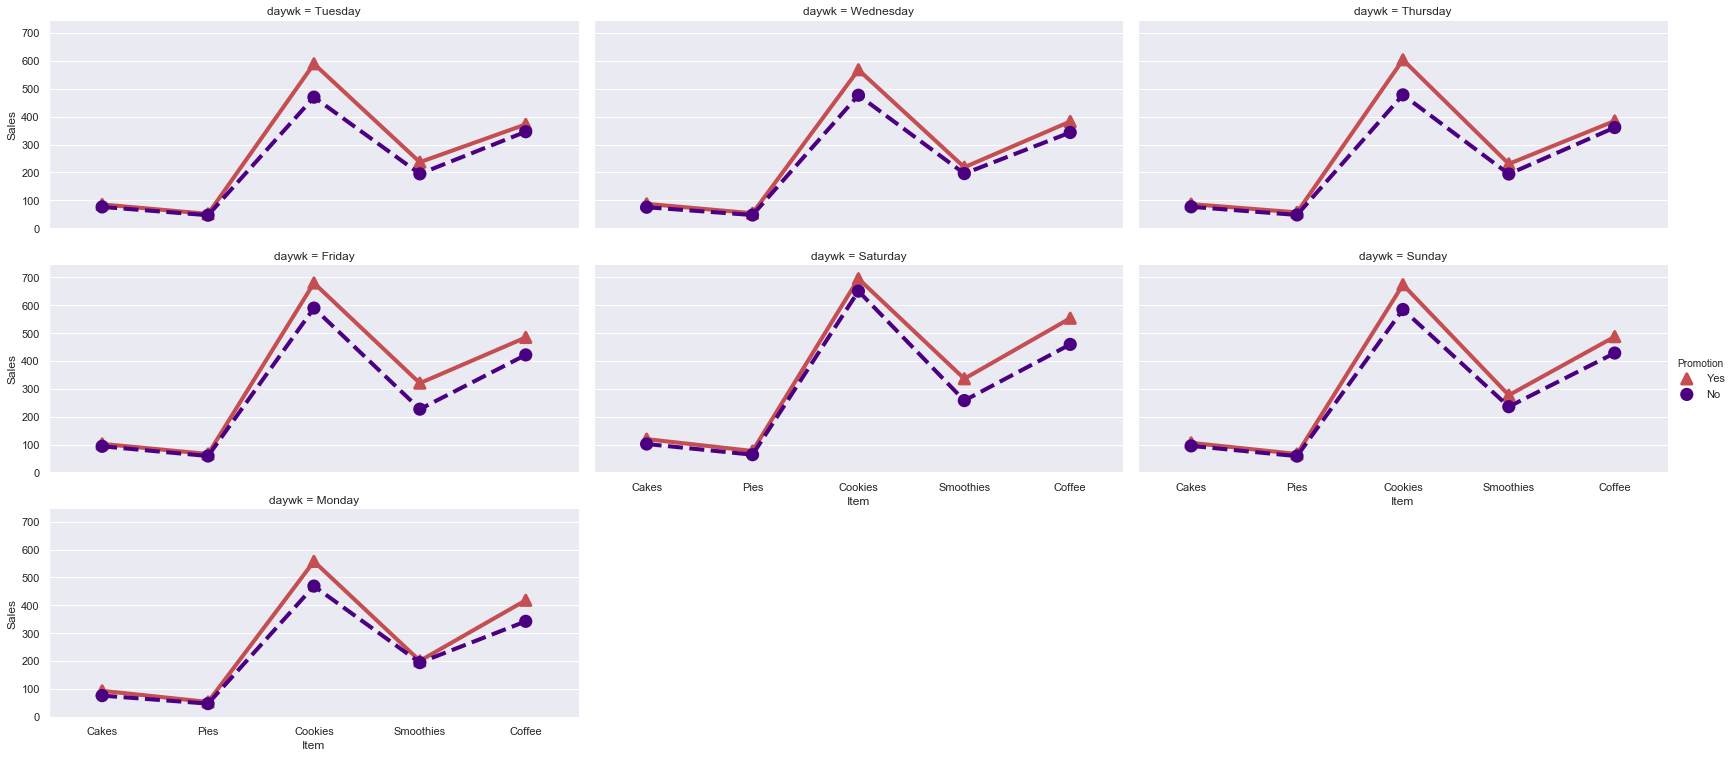

In [188]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='point', 
            hue='Promotion', hue_order=['Yes', 'No'], palette={'Yes':'r', 'No':'indigo'},
           markers=['^', 'o'], linestyles=['-', '--'], ci=None, col='daywk', col_wrap=3,
           height=4, aspect=2, scale=1.5)
plt.tight_layout(pad=5, w_pad=0.25, h_pad=0.25)
plt.show()

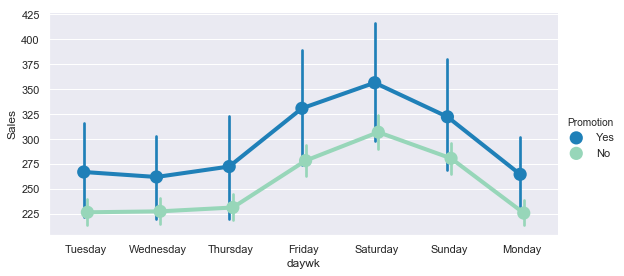

In [189]:
sns.catplot(x='daywk', y="Sales", data=long_sales, kind='point', hue='Promotion', dodge=True,
           hue_order=['Yes', 'No'], palette='YlGnBu_r', height=4, aspect=2, scale=1.5)

plt.show()

## Distribution plots with distplot(), kdeplot(), and rugplot()

In [190]:
from scipy.stats import norm, pareto, gamma

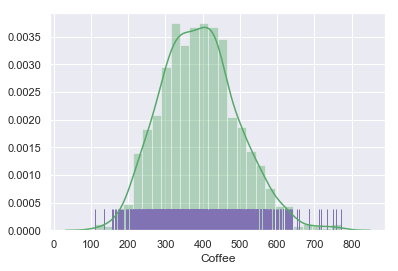

In [191]:
sns.distplot(snacks_sales.Coffee, color='g', rug=True, rug_kws={'color':'m', 'height':0.1})
plt.show()

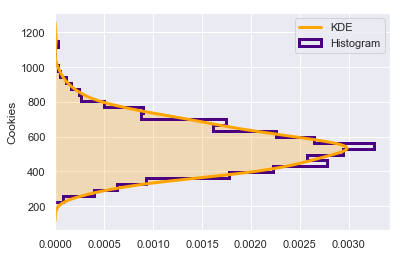

In [192]:
sns.distplot(snacks_sales.Cookies, vertical=True, 
             hist_kws={'histtype':'step', 'linewidth':3, 'alpha':1, 'color':'indigo', 'label':'Histogram'},
             kde_kws={'shade':True, 'color':'orange', 'lw':3, 'label':'KDE'})
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


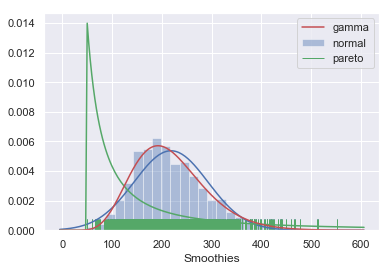

In [193]:
ax = sns.distplot(snacks_sales.Smoothies, fit=norm, kde=False, rug=True, color='b', 
                 fit_kws={'color':'b'}, label='normal')
sns.distplot(snacks_sales.Smoothies, hist=False, fit=pareto, 
             kde=False, rug=True, color='g', label='pareto', fit_kws={'color':'g'}, ax=ax)
sns.distplot(snacks_sales.Smoothies, hist=False, fit=gamma, kde=False, color='r',
            label='gamma', fit_kws={'color': 'r'}, ax=ax)
ax.legend()
plt.show()

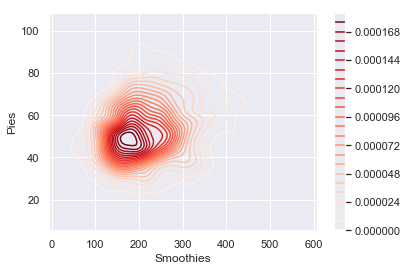

In [194]:
sns.kdeplot(snacks_sales.Smoothies, snacks_sales.Pies, kernel='epa', n_levels=25, cmap='Reds', cbar=True)

plt.show()

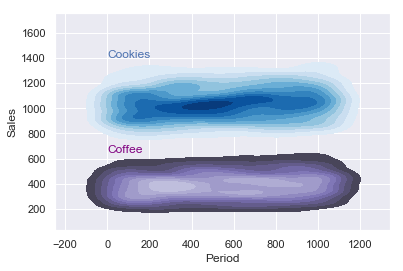

In [195]:

Cookies_temp = snacks_sales.Cookies + 500
ax = sns.kdeplot(snacks_sales.Period, snacks_sales.Coffee, 
                kernel='gau', shade=True, shade_lowest=False,
                cmap='Purples_d')
sns.kdeplot(snacks_sales.Period, Cookies_temp, kernel='cos', 
           shade=True, shade_lowest=False, cmap='Blues')

ax.text(0, 1400, 'Cookies', color='b')
ax.text(0, 650, 'Coffee', color='purple')
ax.set_ylabel('Sales')
plt.show()

## Regression plots

In [196]:
wine_quality = pd.read_csv('winequality.csv', delimiter=';')
quality_map = {3:'Low', 4:'Low', 5:'Med', 6:'Med', 7:'High', 8:'High'}
wine_quality['Quality'] = wine_quality['quality'].map(quality_map)
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Med
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Med


In [197]:
corr = wine_quality.corr()

In [198]:
set(wine_quality.quality)

{3, 4, 5, 6, 7, 8}

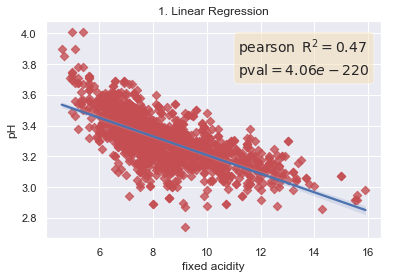

In [199]:
from scipy.stats import pearsonr
R, p = pearsonr(wine_quality['fixed acidity'], wine_quality.pH)

g1 = sns.regplot(x='fixed acidity', y='pH', data=wine_quality,
                truncate=True, ci=99, marker='D', scatter_kws={'color': 'r'})

textstr = '$\mathrm{pearson}\hspace{0.5}\mathrm{R}^2=%.2f$\n$\mathrm{pval}=%.2e$' % (R**2, p)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

g1.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14, va='top', bbox=props)
plt.title('1. Linear Regression')
plt.show()

Text(0.5, 1.0, '2. Non Linear Regression')

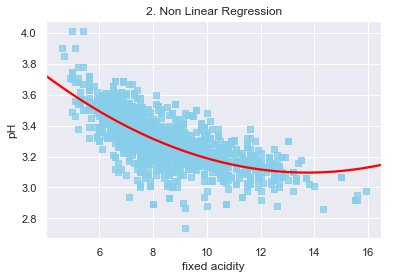

In [200]:
g2 = sns.regplot(x='fixed acidity', y='pH', data=wine_quality, order=2, ci=None,
                marker='s', scatter_kws={'color':'skyblue'}, line_kws={'color':'red'})
plt.title('2. Non Linear Regression')

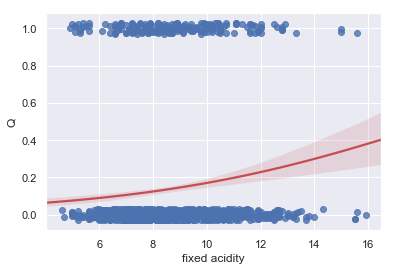

In [201]:
wine_quality['Q'] = wine_quality['Quality'].map({'Low':0, 'Med':0, 'High':1})

g2 = sns.regplot(x='fixed acidity', y='Q', logistic=True, n_boot=750, y_jitter=0.03,
                data=wine_quality, line_kws={'color':'r'})
plt.show()

In [81]:
#testing time series model 
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.44852567]


The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

In [107]:

# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.47414981]


The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.


In [108]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.52025986]
